## 출산율은 향후(19년 후) 총 인구대비 생산가능인구 비율에 얼마나 영향을 끼치는가?

### 가설 : 출산율은 19년 후의 생산가능인구에 영향을 끼친다.

In [1]:
import pandas as pd
import numpy as np

def people_preprocessing(x) :
    people_data = pd.read_csv(x, delimiter = '\t', skiprows=52)
    people_data = people_data[['2018', '강동구', '74.8']]
    people_data.columns = ['기간', '지역', '생산가능인구 비율']
    people_data = people_data[people_data['지역'] == '합계']
    people_data = people_data[['기간', '생산가능인구 비율']].copy() # 생산 가능인구 합계만 산출
    
    return people_data

def birth_preprocessing(x) :
    birth_data = pd.read_csv(x, delimiter = '\t')
    birth_data = birth_data[['기간', '지역', '총계']]
    birth_data.columns = ['기간', '지역', '총 출생자']
    birth_data = birth_data[birth_data['지역'] == '합계']
    birth_data = birth_data[['기간', '총 출생자']].copy() # 출생자 수 인구 합계만 산출
    birth_data['기간'] = pd.to_numeric(birth_data['기간'])
    
    # 향후 생산가능 데이터와 합치기 위해서 + 19
    #birth_data['기간'] = pd.to_numeric(birth_data['기간']) + 19
    
    return birth_data

def seoul_preprocessing(x) :
    seoul_data = pd.read_csv(x, delimiter = '\t', skiprows = 2)
    seoul_data = seoul_data[seoul_data['자치구'] == '합계']
    seoul_data = seoul_data[['기간', '계']].copy()
    seoul_data.columns = ['기간', '서울시 인구']
    seoul_data['기간'] = pd.to_numeric(seoul_data['기간'])

    return seoul_data

def old_preprocessing(x) :
    old_data = pd.read_csv(x, delimiter = '\t', skiprows = 2)
    old_data = old_data[old_data['지역'] == '합계']
    
    return old_data
    
def life_preprocessing(x) : 
    life_data = pd.read_csv(x, delimiter = '\t')
    life_data = life_data[life_data['연령'] == '0세']
    life_data = life_data[['기간', '전체']]
    life_data.columns = ['기간', '기대 수명(세)']
    
    return life_data

def get_number(x) : # 133,359 와 같이 표현된 숫자를 133 와 같이 표현하기 위함
    temp = x.split(',')[0]
    return temp

def get_number2(x) : # 133,359 와 같이 표현된 숫자를 133 와 같이 표현하기 위함
    temp2 = x.split(',')[1]
    return (temp2)


In [2]:
people_path = f'data/서울시 자치구별 연령계층별 인구구성비 (추계인구) 통계(2017_2037).txt'
people_ratio = people_preprocessing(people_path)
people_ratio

,기간,생산가능인구 비율
0,2019,75.0
26,2020,74.4
52,2021,74.0
78,2022,73.5
104,2023,72.9
130,2024,72.2
156,2025,71.4
182,2026,70.5
208,2027,69.9
234,2028,69.0


In [3]:
# 데이터 확인
# df = pd.read_csv(people_path, delimiter = '\t', skiprows=52)
# df.shape
# df.head()
# df.tail()
# df.index
# df.columns
# df.info()
# df.dtypes

In [4]:
birth_path = f'data/서울시 출산순위별 출생 통계(2000_2018).txt'
birth_rate = birth_preprocessing(birth_path)
birth_rate

,기간,총 출생자
1,2000,"133,154"
27,2001,"114,764"
53,2002,"102,008"
79,2003,"101,227"
105,2004,"99,828"
131,2005,"90,468"
157,2006,"93,922"
183,2007,"101,249"
209,2008,"94,736"
235,2009,"89,594"


In [5]:
# 데이터 확인
# df2 = pd.read_csv(birth_path, delimiter = '\t')
# df2.shape
# df2.head()
# df2.tail()
# df2.index
# df2.columns
# df2.info()
# df2.dtypes

In [6]:
# 서울시 전체 생산가능인구 비율
people = people_ratio.groupby('기간').sum() / 100
people

,생산가능인구 비율
기간,
2019,0.750
2020,0.744
2021,0.740
2022,0.735
2023,0.729
2024,0.722
2025,0.714
2026,0.705
2027,0.699


In [7]:
birth = birth_rate.groupby('기간').sum()
birth_number = birth['총 출생자'].apply(get_number)
birth_number

기간
2000    133
2001    114
2002    102
2003    101
2004     99
2005     90
2006     93
2007    101
2008     94
2009     89
2010     93
2011     91
2012     93
2013     84
2014     83
2015     83
2016     75
2017     65
2018     58
Name: 총 출생자, dtype: object

In [8]:
# Series 를 DataFrame으로 변경.
birth_final = pd.DataFrame(birth_number)
# birth_temp = birth_final # 이후 서울시 인구와 합치기 위해

birth_final.columns = ['총 출생자(단위 : 천명)']
birth_final['총 출생자(단위 : 천명)'] = pd.to_numeric(birth_final['총 출생자(단위 : 천명)'])

birth_final

,총 출생자(단위 : 천명)
기간,
2000,133
2001,114
2002,102
2003,101
2004,99
2005,90
2006,93
2007,101
2008,94


#### 데이터 분석 및 이미지 출력을 위한 설정

In [9]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import style
import seaborn as sns
style.use('ggplot')
%matplotlib inline

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

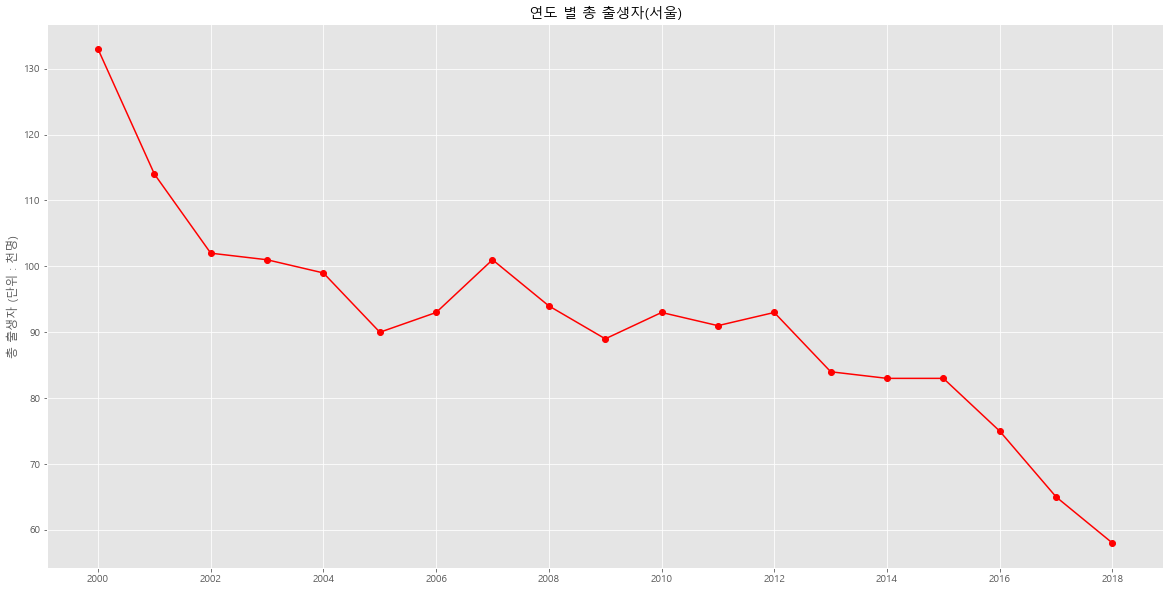

In [10]:
# 시간이 지남에 따라 '총 출생자 (단위 : 천명)'의 변화를 시각화하여 보여준다
plt.figure(figsize = (20, 10))
birth_final.index = pd.to_datetime(birth_final.index, format = '%Y')
plt.ylabel('총 출생자 (단위 : 천명)')
plt.title("연도 별 총 출생자(서울)")
plt.plot(birth_final['총 출생자(단위 : 천명)'], color = 'r', marker = "o")
plt.show()

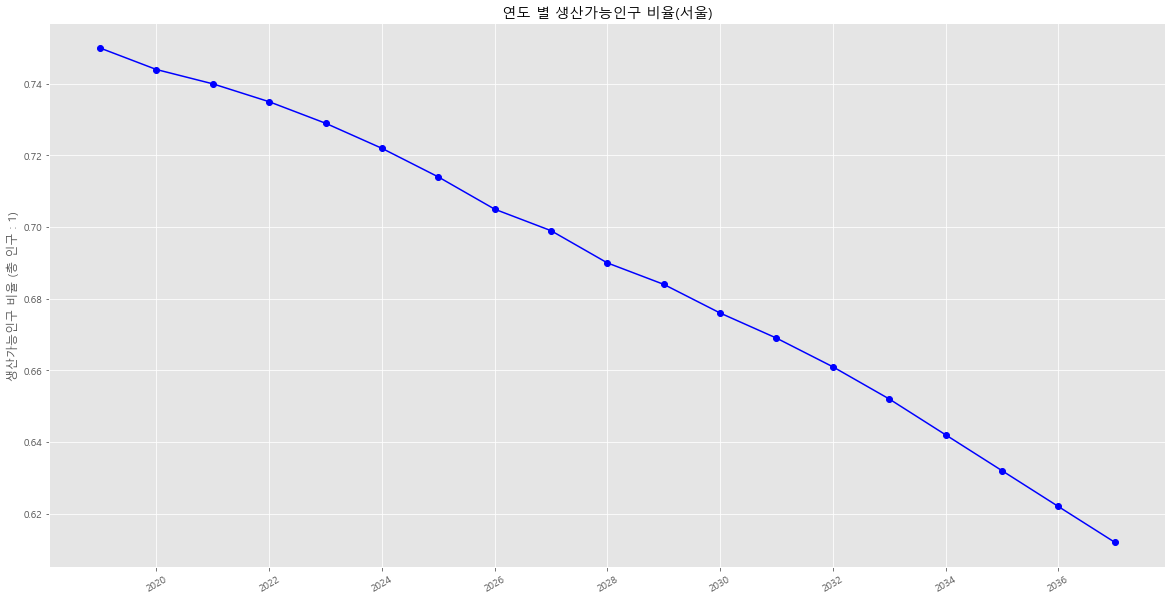

In [11]:
# 시간이 지남에 따라 '생산가능인구 비율'의 변화를 시각화하여 보여준다

plt.figure(figsize = (20, 10))
people.index = pd.to_datetime(people.index, format = '%Y')

plt.xticks(rotation = 30)
plt.ylabel('생산가능인구 비율 (총 인구 : 1)')
plt.title("연도 별 생산가능인구 비율(서울)")
plt.plot(people['생산가능인구 비율'], color = 'b', marker = 'o')
plt.show()

### 검증 : 출생자 수와 향후 생산가능인구 비율은 서로 비례하는 경향성을 지니지만 명확하게 시각화가 되지 않는다. 직접적인 연관성을 찾기 힘들다.

예상되는 이유
* 1) 전체 인구(서울시) 대비 출산율이 아니기 때문에 그럴 수 있다.

* 2) 향후 : 19년 후이기 때문에 여러 요인들이 있을 수 있다.(Ex) 의료 기술 발달에 따른 평균 수명 증가, 여러 요인에 의한 사망자 등)

* 3) 출산율 데이터는 과거의 데이터이므로 명확한 것에 비해서 생산가능 인구 비율은 예측한 값이므로 예측이 오차 없이 정확하지 않을 수 있다. -> 해결할 수 없는 문제

#### 출생자 수를 인구 대비 출생자 비율로 바꿔서 1)을 해결해보고자 한다.

In [12]:
seoul_path = f'data/서울시 인구(2000_2018).txt'
seoul_data = seoul_preprocessing(seoul_path)
seoul_data


,기간,서울시 인구
0,2000,"10,373,234"
26,2001,"10,331,244"
52,2002,"10,280,523"
78,2003,"10,276,968"
104,2004,"10,287,847"
130,2005,"10,297,004"
156,2006,"10,356,202"
182,2007,"10,421,782"
208,2008,"10,456,034"
234,2009,"10,464,051"


In [13]:
seoul_people = seoul_data.groupby('기간').sum()
seoul_people1 = seoul_people['서울시 인구'].apply(get_number)
seoul_people2 = seoul_people['서울시 인구'].apply(get_number2)
seoul_people1 = pd.DataFrame(seoul_people1)
seoul_people2 = pd.DataFrame(seoul_people2)


In [14]:
seoul_people1['서울시 인구'] = pd.to_numeric(seoul_people1['서울시 인구'])
seoul_people2['서울시 인구'] = pd.to_numeric(seoul_people2['서울시 인구'])

In [15]:
seoul_people['서울시 인구'] = seoul_people1['서울시 인구'] * 1000 + seoul_people2['서울시 인구']

In [16]:
seoul_people

,서울시 인구
기간,
2000,10373
2001,10331
2002,10280
2003,10276
2004,10287
2005,10297
2006,10356
2007,10421
2008,10456


In [17]:
seoul_people.columns = ['서울시 인구(단위 : 천명)']
seoul_people

,서울시 인구(단위 : 천명)
기간,
2000,10373
2001,10331
2002,10280
2003,10276
2004,10287
2005,10297
2006,10356
2007,10421
2008,10456


In [18]:
birth_final.dtypes

총 출생자(단위 : 천명)    int64
dtype: object

In [19]:
birth_final = pd.DataFrame(birth_number)
birth_final.columns = ['총 출생자(단위 : 천명)']
birth_final['총 출생자(단위 : 천명)'] = pd.to_numeric(birth_final['총 출생자(단위 : 천명)'])

seoul_people['총 출생자(단위 : 천명)'] = birth_final['총 출생자(단위 : 천명)']
seoul_people

,서울시 인구(단위 : 천명),총 출생자(단위 : 천명)
기간,,
2000,10373,133
2001,10331,114
2002,10280,102
2003,10276,101
2004,10287,99
2005,10297,90
2006,10356,93
2007,10421,101
2008,10456,94


In [20]:
seoul_ratio = birth_final['총 출생자(단위 : 천명)'] / seoul_people['서울시 인구(단위 : 천명)'] * 100
seoul_ratio = pd.DataFrame(seoul_ratio)
seoul_ratio.columns = ['인구 대비 출생자 수(%)']
seoul_ratio

,인구 대비 출생자 수(%)
기간,
2000,1.282175
2001,1.103475
2002,0.992218
2003,0.982873
2004,0.962380
2005,0.874041
2006,0.898030
2007,0.969197
2008,0.899005


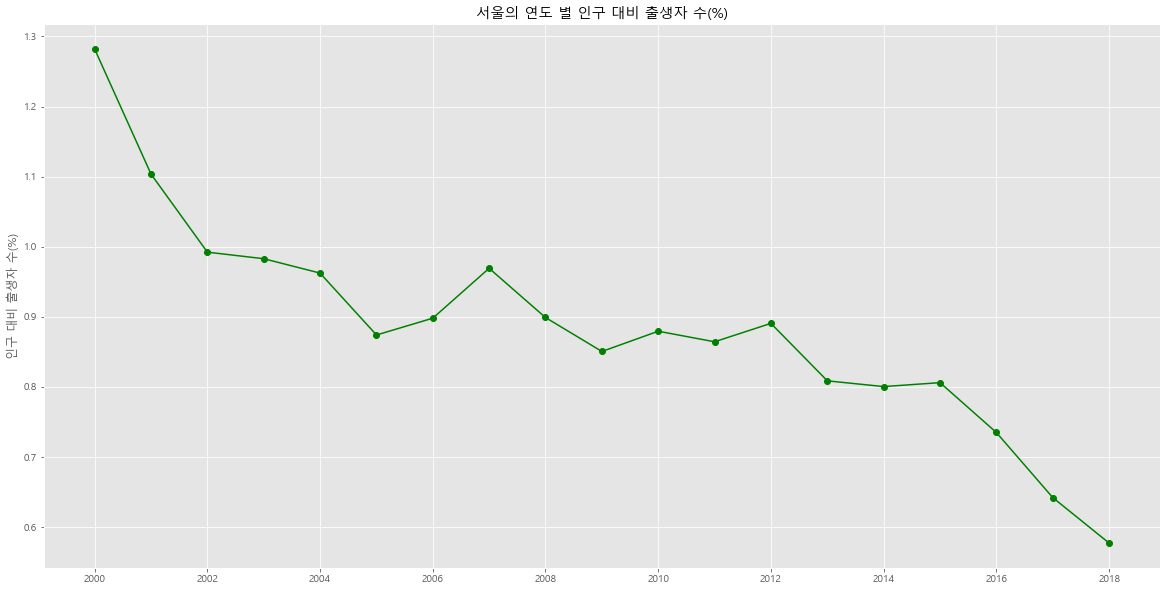

In [21]:
# 시간이 지남에 따라 '인구 대비 출생자 수(%)'의 변화를 시각화하여 보여준다
plt.figure(figsize = (20, 10))
seoul_ratio.index = pd.to_datetime(seoul_ratio.index, format = '%Y')
plt.ylabel('인구 대비 출생자 수(%)')
plt.title('서울의 연도 별 인구 대비 출생자 수(%)')
plt.plot(seoul_ratio['인구 대비 출생자 수(%)'], color = 'g', marker = "o")
plt.show()

####  출생자 수를 인구대비 출생자 수(비율)로 바꾸었지만 출생자 수와 향후 생산가능인구 비율은 서로 비례하는 경향성을 지니지만 명확하게 시각화가 되지 않는다는 문제점을 해결할 수는 없었다.

#### 다만, 출생자 수와 연도별 인구 대비 출생자 수가 거의 유사한 그래프를 보임을 확인함으로써 2000 ~ 2018년의 전체 인구의 변동은 거의 없다는 것을 확인할 수 있었다.

#### 2) 향후 : 19년 후이기 때문에 여러 요인들이 있을 수 있다.(Ex) 의료 기술 발달에 따른 평균 수명 증가(고령자 인구 수 증가), 여러 요인에 의한 사망자 등) 의

* 고령자 인구 수 증가 부분을 시각화하여 2)를 해결하여 가설의 타당성을 검증해보도록 한다.

In [22]:
old_path = f'data/서울시 고령자현황 (구별) 통계(2011_2019).txt'
old_data = old_preprocessing(old_path)

In [23]:
old_data2 = old_data
old_data

,기간,지역,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,계.3,남자.3,여자.3
0,2011,합계,"10,528,774","5,208,492","5,320,282","1,049,425","455,302","594,123","1,044,750","453,055","591,695","4,675","2,247","2,428"
26,2012,합계,"10,442,426","5,159,665","5,282,761","1,110,995","484,345","626,650","1,105,583","481,951","623,632","5,412","2,394","3,018"
52,2013,합계,"10,388,055","5,126,351","5,261,704","1,167,177","511,164","656,013","1,161,708","508,729","652,979","5,469","2,435","3,034"
78,2014,합계,"10,369,593","5,109,013","5,260,580","1,221,616","536,758","684,858","1,216,529","534,294","682,235","5,087","2,464","2,623"
104,2015,합계,"10,297,138","5,063,550","5,233,588","1,267,563","558,202","709,361","1,262,436","555,660","706,776","5,127","2,542","2,585"
130,2016,합계,"10,204,057","5,007,379","5,196,678","1,300,877","573,091","727,786","1,295,899","570,490","725,409","4,978","2,601","2,377"
156,2017,합계,"10,124,579","4,957,857","5,166,722","1,365,126","602,107","763,019","1,359,901","599,378","760,523","5,225","2,729","2,496"
182,2018,합계,"10,049,607","4,910,849","5,138,758","1,416,131","625,040","791,091","1,410,297","621,950","788,347","5,834","3,090","2,744"
208,2019,합계,"10,010,983","4,877,725","5,133,258","1,485,272","656,595","828,677","1,478,664","653,108","825,556","6,608","3,487","3,121"


In [24]:
old_data = old_data[['기간', '계.1']]
old_data.columns = ['기간', '고령자 수']

In [25]:
old_data

,기간,고령자 수
0,2011,"1,049,425"
26,2012,"1,110,995"
52,2013,"1,167,177"
78,2014,"1,221,616"
104,2015,"1,267,563"
130,2016,"1,300,877"
156,2017,"1,365,126"
182,2018,"1,416,131"
208,2019,"1,485,272"


In [26]:
old_data2 = old_data2[['기간', '계']]
old_data2.columns = ['기간', '총 인구']

In [27]:
old_people = old_data.groupby('기간').sum()
old_people1 = old_people['고령자 수'].apply(get_number)
old_people2 = old_people['고령자 수'].apply(get_number2)
old_people1 = pd.DataFrame(old_people1)
old_people2 = pd.DataFrame(old_people2)

In [28]:
old_people1['고령자 수'] = pd.to_numeric(old_people1['고령자 수'])
old_people2['고령자 수'] = pd.to_numeric(old_people2['고령자 수'])

In [29]:
old_people['고령자 수'] = old_people1['고령자 수'] * 1000 + old_people2['고령자 수']
old_people

,고령자 수
기간,
2011,1049
2012,1110
2013,1167
2014,1221
2015,1267
2016,1300
2017,1365
2018,1416
2019,1485


In [30]:
#old_people.dtypes

In [31]:
seoul_people_all = old_data2.groupby('기간').sum()
seoul_people1 = seoul_people_all['총 인구'].apply(get_number)
seoul_people2 = seoul_people_all['총 인구'].apply(get_number2)
seoul_people1 = pd.DataFrame(seoul_people1)
seoul_people2 = pd.DataFrame(seoul_people2)

In [32]:
seoul_people1['총 인구'] = pd.to_numeric(seoul_people1['총 인구'])
seoul_people2['총 인구'] = pd.to_numeric(seoul_people2['총 인구'])

In [33]:
seoul_people_all['총 인구'] = seoul_people1['총 인구'] * 1000 + seoul_people2['총 인구']
seoul_people_all

,총 인구
기간,
2011,10528
2012,10442
2013,10388
2014,10369
2015,10297
2016,10204
2017,10124
2018,10049
2019,10010


In [34]:
#old_people.columns = ['고령자 수(단위 : 천명)']
old_people['총 인구'] = seoul_people_all
old_people

,고령자 수,총 인구
기간,,
2011,1049,10528
2012,1110,10442
2013,1167,10388
2014,1221,10369
2015,1267,10297
2016,1300,10204
2017,1365,10124
2018,1416,10049
2019,1485,10010


In [35]:
old_people['인구 대비 고령자 수(%)'] = old_people['고령자 수'] / old_people['총 인구'] * 100
old_people.columns = ['고령자 수(단위 : 천명)', '총 인구(단위 : 천명)', '인구 대비 고령자 수(%)']
old_people

,고령자 수(단위 : 천명),총 인구(단위 : 천명),인구 대비 고령자 수(%)
기간,,,
2011,1049,10528,9.963906
2012,1110,10442,10.630147
2013,1167,10388,11.234116
2014,1221,10369,11.775485
2015,1267,10297,12.304555
2016,1300,10204,12.740102
2017,1365,10124,13.482813
2018,1416,10049,14.090954
2019,1485,10010,14.835165


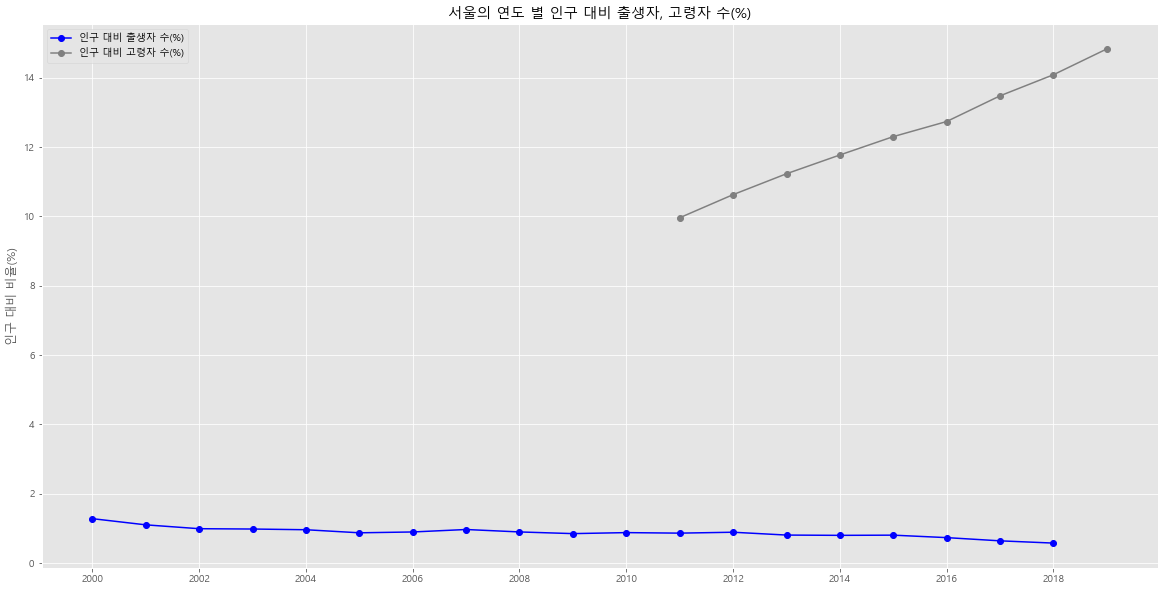

In [36]:
# 시간이 지남에 따라 '인구 대비 출생자, 고령자 수(%)'의 변화를 시각화하여 보여준다
plt.figure(figsize = (20, 10))
seoul_ratio.index = pd.to_datetime(seoul_ratio.index, format = '%Y')
old_people.index = pd.to_datetime(old_people.index, format = '%Y')
plt.ylabel('인구 대비 비율(%)')
plt.title('서울의 연도 별 인구 대비 출생자, 고령자 수(%)')

plt.plot(seoul_ratio['인구 대비 출생자 수(%)'], color = 'blue', marker = "o")
plt.plot(old_people['인구 대비 고령자 수(%)'], color = 'grey', marker = "o")

plt.legend(['인구 대비 출생자 수(%)', '인구 대비 고령자 수(%)'], loc = 'upper left')
#plt.legend(seoul_ratio, '인구 대비 출생자 수(%)')
#plt.legend(old_people)

plt.show()

#### 시간이 지남에 따라 인구 대비 고령자 비율은 증가하지만, 출생자 수는 감소하고 있다. 출생자 수의 감소 비율은 고령자 수의 증가 비율보다 현저히 적은 것을 확인할 수 있다.
* 인구 대비 출생자 비율 2000년 1.28% -> 2018년 0.58%로 0.70% 감소
(소수점 셋째짜리 반올림)
* 인구 대비 고령자 비율 2011년 9.96% -> 2018년 14.84%로 4.88% 증가
(소수점 셋째짜리 반올림)

#### 평균 수명 통계로 고령자 수의 지속적인 증가가 일어날 것임을 보이고자 한다.

In [37]:
life_path = f'data/서울시 기대 수명(2000_2018).txt'
life_data = life_preprocessing(life_path)
life_data = life_data.groupby('기간').sum()
life_data

,기대 수명(세)
기간,
2000,76.0
2001,76.5
2002,76.8
2003,77.3
2004,77.8
2005,78.2
2006,78.8
2007,79.2
2008,79.6


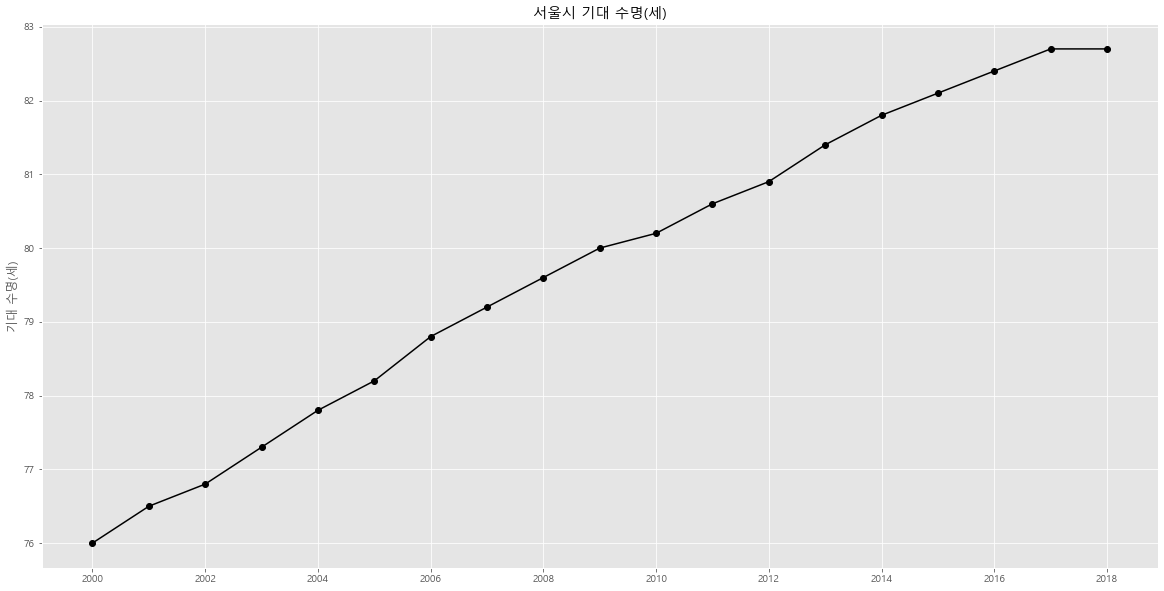

In [38]:
# 시간이 지남에 따라 '인구 대비 출생자 수(%)'의 변화를 시각화하여 보여준다
plt.figure(figsize = (20, 10))
life_data.index = pd.to_datetime(life_data.index, format = '%Y')
plt.ylabel('기대 수명(세)')
plt.title('서울시 기대 수명(세)')
plt.plot(life_data['기대 수명(세)'], color = 'black', marker = "o")
plt.show()

#### 시간이 지남에 따라 기대 수명이 증가함을 확인할 수 있다. 위의 자료로써 고령자 수가 시간에 따라 늘어날 것임을 뒷받침할 수 있다.

# 결론
- 인구 대비 생산가능 인구 비율은 총 인구에서 유소년 인구와 고령 인구를 제외한 것을 총 인구로 나눈 비율이다.

- 장래의 인구 대비 생산가능인구 비율이 감소하는 것은 출생자 수가 지속적으로 감소하는 영향도 있으나, 고령자 비율이 지속적으로 증가하는 것에 더 영향이 큰 것을 알 수 있다. 

- 장래에 생산가능 인구가 될 출생자 수가 감소하는 추세를 유지한다면 평균 수명의 증가에 따른 고령자 수의 증가를 따라가지 못하여 생산가능 인구 비율이 계속 감소할 것임을 확인할 수 있다.

#### 출처 
출처 :
서울시 출산순위별 출생 통계(2000 ~ 2018)
http://data.seoul.go.kr/dataList/10763/S/2/datasetView.do

서울시 자치구별 연령계층별 인구구성비 (추계인구) 통계(서울 시 인구 구성비 유소년인구, 생산가능인구, 고령인구)(2017 ~ 2037)
http://data.seoul.go.kr/dataList/10822/S/2/datasetView.do

서울시 고령자 현황(구별) 통계
http://data.seoul.go.kr/dataList/10730/S/2/datasetView.do;jsessionid=CC90C9AFFCA2CF97A2B1EC64EA751AA5.new_portal-svr-21

서울시 기대 인구 통계
https://www.data.go.kr/data/15047001/fileData.do

추계인구 기준(코호트 요인법)
http://data.si.re.kr/node/5

